# Homework 7


## References

+ Lectures 24-26 (inclusive).

## Instructions

+ Type your name and email in the "Student details" section below.
+ Develop the code and generate the figures you need to solve the problems using this notebook.
+ For the answers that require a mathematical proof or derivation you should type them using latex. If you have never written latex before and you find it exceedingly difficult, we will likely accept handwritten solutions.
+ The total homework points are 100. Please note that the problems are not weighed equally.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib_inline
matplotlib_inline.backend_inline.set_matplotlib_formats('svg')
import seaborn as sns
sns.set_context("paper")
sns.set_style("ticks")

import scipy
import scipy.stats as st
import urllib.request
import os

def download(
    url : str,
    local_filename : str = None
):
    """Download a file from a url.

    Arguments
    url            -- The url we want to download.
    local_filename -- The filemame to write on. If not
                      specified
    """
    if local_filename is None:
        local_filename = os.path.basename(url)
    urllib.request.urlretrieve(url, local_filename)

## Student details

+ **First Name:Ali Ibrahim A**
+ **Last Name:Albazroun**
+ **Email:aia@illinois.edu**

In this problem, you must use a deep neural network (DNN) to perform a regression task.
The dataset we are going to use is the [Airfoil Self-Noise Data Set](https://archive.ics.uci.edu/ml/datasets/Airfoil+Self-Noise#)
From this reference, the description of the dataset is as follows:

> The NASA data set comprises different size NACA 0012 airfoils at various wind tunnel speeds and angles of attack. The span of the airfoil and the observer position were the same in all of the experiments.
>
> Attribute Information:
> This problem has the following inputs:
> 1. Frequency, in Hertzs.
> 2. The angle of attack, in degrees.
> 3. Chord length, in meters.
> 4. Free-stream velocity, in meters per second.
> 5. Suction side displacement thickness, in meters.

> The only output is:
> 6. Scaled sound pressure level in decibels.

You will have to do regression between the inputs and the output using a DNN.
Before we start, let's download and load the data.

In [2]:
!curl -O --insecure "https://archive.ics.uci.edu/ml/machine-learning-databases/00291/airfoil_self_noise.dat"

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 59984    0 59984    0     0   138k      0 --:--:-- --:--:-- --:--:--  138k


The data are in simple text format.
Here is how we can load them:

In [3]:
data = np.loadtxt('airfoil_self_noise.dat')
data

array([[8.00000e+02, 0.00000e+00, 3.04800e-01, 7.13000e+01, 2.66337e-03,
        1.26201e+02],
       [1.00000e+03, 0.00000e+00, 3.04800e-01, 7.13000e+01, 2.66337e-03,
        1.25201e+02],
       [1.25000e+03, 0.00000e+00, 3.04800e-01, 7.13000e+01, 2.66337e-03,
        1.25951e+02],
       ...,
       [4.00000e+03, 1.56000e+01, 1.01600e-01, 3.96000e+01, 5.28487e-02,
        1.06604e+02],
       [5.00000e+03, 1.56000e+01, 1.01600e-01, 3.96000e+01, 5.28487e-02,
        1.06224e+02],
       [6.30000e+03, 1.56000e+01, 1.01600e-01, 3.96000e+01, 5.28487e-02,
        1.04204e+02]])

You may work directly with `data`, but, for your convenience, I am going to put them also in a nice Pandas DataFrame:

In [4]:
import pandas as pd
df = pd.DataFrame(data, columns=['Frequency', 'Angle_of_attack', 'Chord_length',
                                 'Velocity', 'Suction_thickness', 'Sound_pressure'])
df

Frequency  Angle_of_attack  Chord_length  Velocity  Suction_thickness  \
0         800.0              0.0        0.3048      71.3           0.002663   
1        1000.0              0.0        0.3048      71.3           0.002663   
2        1250.0              0.0        0.3048      71.3           0.002663   
3        1600.0              0.0        0.3048      71.3           0.002663   
4        2000.0              0.0        0.3048      71.3           0.002663   
...         ...              ...           ...       ...                ...   
1498     2500.0             15.6        0.1016      39.6           0.052849   
1499     3150.0             15.6        0.1016      39.6           0.052849   
1500     4000.0             15.6        0.1016      39.6           0.052849   
1501     5000.0             15.6        0.1016      39.6           0.052849   
1502     6300.0             15.6        0.1016      39.6           0.052849   

      Sound_pressure  
0            126.201  
1            125.201  
2            125.951  
3            127.591  
4            127.461  
...              ...  
1498         110.264  
1499         109.254  
1500         106.604  
1501         106.224  
1502         104.204  

[1503 rows x 6 columns]

### Part A - Analyze the data visually

It is always a good idea to visualize the data before you start doing anything with them.

#### Part A.I. - Do the histograms of all variables
Use as many code segments as you need below to plot the histogram of each variable (all inputs and the output in separate plots)
Discuss whether or not you need to standardize the data before moving to regression.

**Answer:**

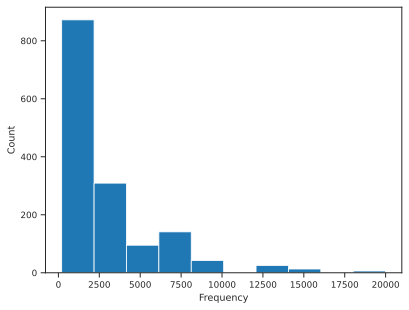

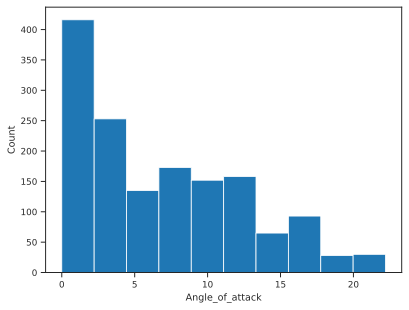

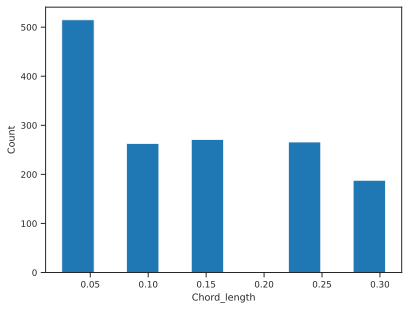

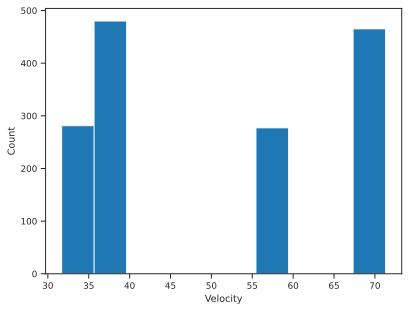

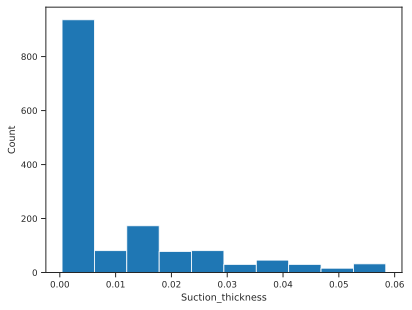

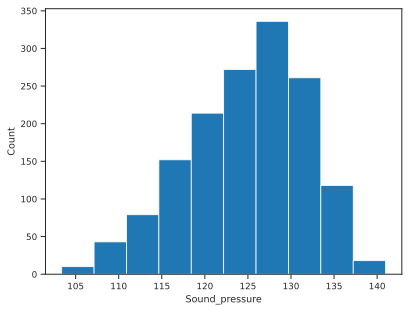

<Figure size 640x480 with 0 Axes>

In [19]:
# Your code here
for key in df.keys():
  plt.hist(df[key])
  plt.xlabel(key)
  plt.ylabel("Count")
  plt.show()
  sns.despine(trim=True)

The data has wildly different scales, it makes sense to standardize.

In [45]:
from sklearn.preprocessing import StandardScaler
for i,key in enumerate(df.keys()):
  key_array = df[key].to_numpy().reshape(-1,1)
  scaler = StandardScaler().fit(key_array)
  data[:,i] = scaler.transform(key_array).flatten()
  df[key] = scaler.transform(key_array)


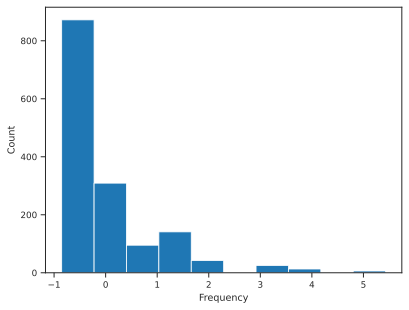

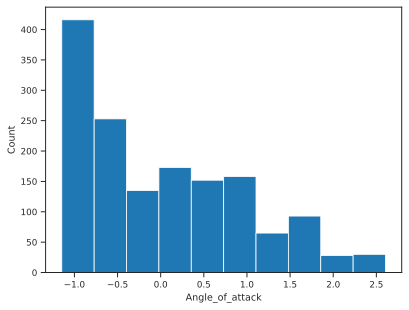

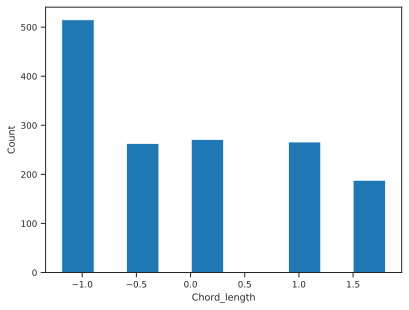

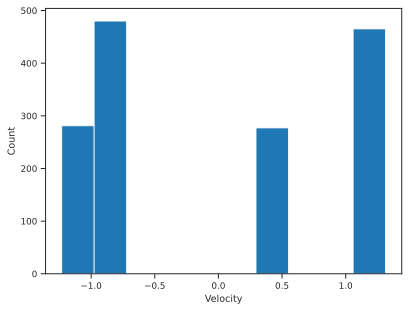

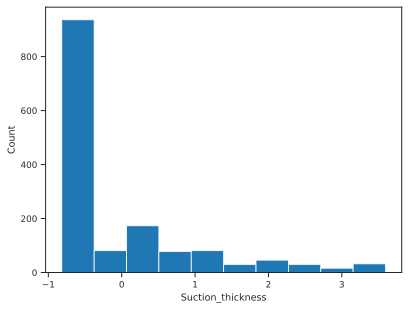

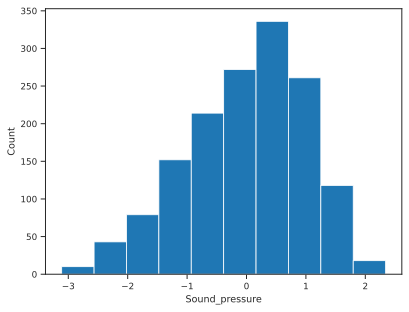

<Figure size 640x480 with 0 Axes>

In [41]:
for key in df.keys():
  plt.hist(df[key])
  plt.xlabel(key)
  plt.ylabel("Count")
  plt.show()
  sns.despine(trim=True)

#### Part A.II - Do the scatter plots between all input variables

Do the scatter plot between all input variables. This will give you an idea of the range of experimental conditions.
Whatever model you build will only be valid inside the domain implicitly defined with your experimental conditions.
Are there any holes in the dataset, i.e., places where you have no data?

**Answer:**

In [30]:
# Your code here
my_input_keys = list(df.keys())
my_input_keys.remove('Sound_pressure')


['Frequency', 'Angle_of_attack', 'Chord_length', 'Velocity', 'Suction_thickness']


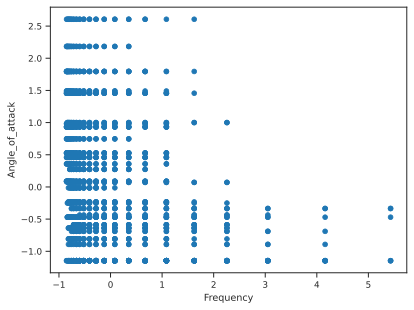

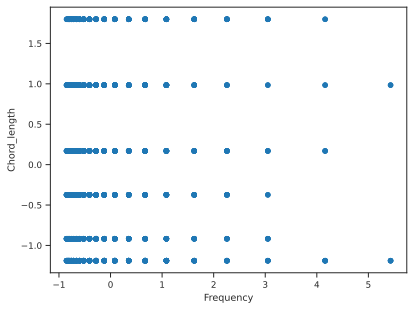

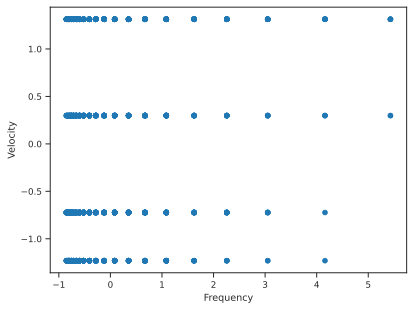

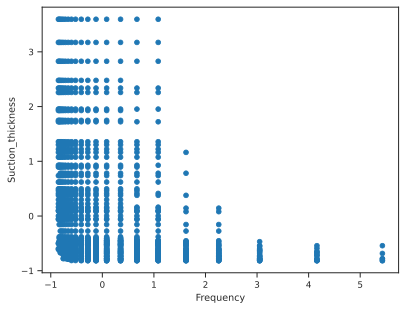

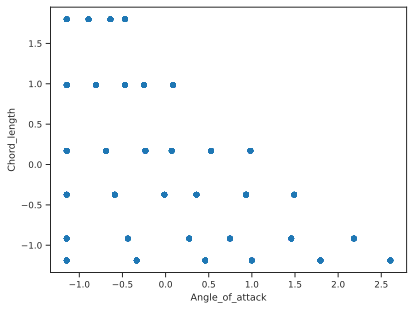

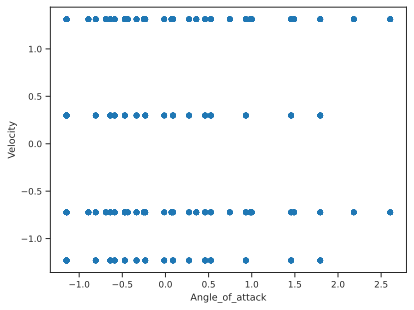

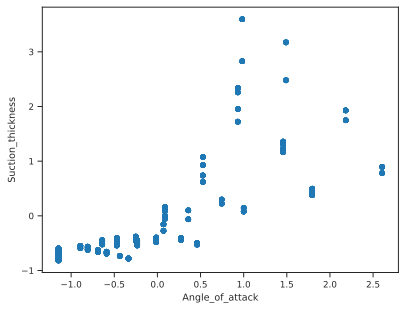

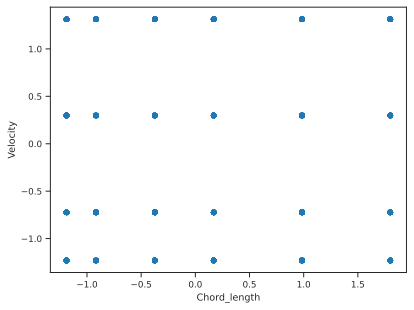

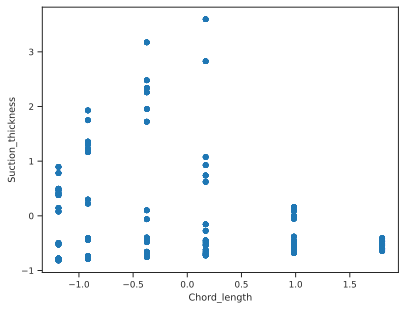

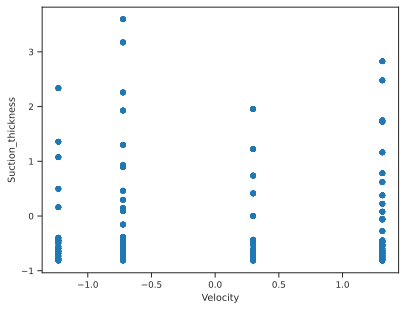

<Figure size 640x480 with 0 Axes>

In [42]:
from itertools import combinations
for input_pair in combinations(my_input_keys, 2):
  plt.scatter(df[input_pair[0]],df[input_pair[1]])
  plt.xlabel(input_pair[0])
  plt.ylabel(input_pair[1])
  plt.show()
  sns.despine(trim=True)

Yes there are holes in the dataset.

#### Part A.III - Do the scatter plots between each input and the output

Do the scatter plot between each input variable and the output.
This will give you an idea of the functional relationship between the two.
Do you observe any obvious patterns?

**Answer:**

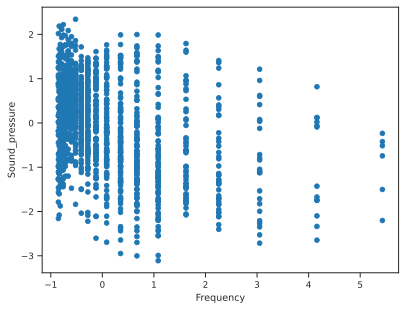

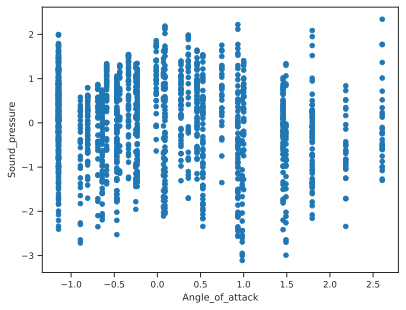

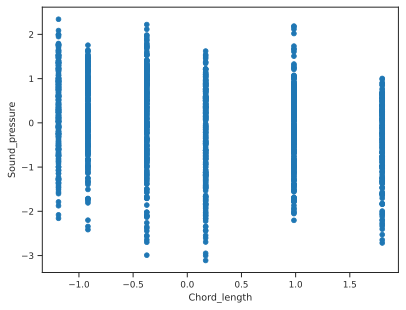

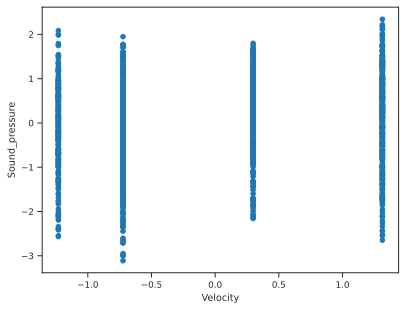

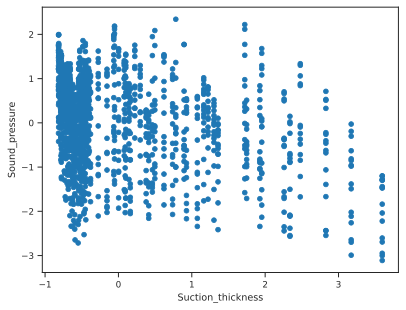

<Figure size 640x480 with 0 Axes>

In [43]:
# Your code here
for key in my_input_keys:
  plt.scatter(df[key],df['Sound_pressure'])
  plt.xlabel(key)
  plt.ylabel("Sound_pressure")
  plt.show()
  sns.despine(trim=True)

There does not seem to be any obvious patterns.

### Part B - Use DNN to do regression

Let start by separating inputs and outputs for you:

In [46]:
X = data[:, :-1]
y = data[:, -1][:, None]

#### Part B.I - Make the loss

Use standard torch functionality to create a function that gives you the sum of square error followed by an L2 regularization term for the weights and biases of all network parameters (remember that the L2 regularization is like putting a Gaussian prior on each parameter).
Follow the instructions below and fill in the missing code.

**Answer:**

In [49]:
import torch
import torch.nn as nn

# Use standard torch functionality to define a function
# mse_loss(y_obs, y_pred) which gives you the mean of the sum of the square
# of the difference between y_obs and y_pred
# Hint: This is already implemented in PyTorch. You can just reuse it.
mse_loss = nn.MSELoss()# your code here

In [50]:
# Test your code here
y_obs_tmp = np.random.randn(100, 1)
y_pred_tmp = np.random.randn(100, 1)
print('Your mse_loss: {0:1.2f}'.format(mse_loss(torch.Tensor(y_obs_tmp),
                                                torch.Tensor(y_pred_tmp))))
print('What you should be getting: {0:1.2f}'.format(np.mean((y_obs_tmp - y_pred_tmp) ** 2)))

Your mse_loss: 1.99
What you should be getting: 1.99


In [51]:
# Now, we will create a regularization term for the loss
# I'm just going to give you this one:
def l2_reg_loss(params):
    """
    This needs an iterable object of network parameters.
    You can get it by doing `net.parameters()`.

    Returns the sum of the squared norms of all parameters.
    """
    l2_reg = torch.tensor(0.)
    for p in params:
        l2_reg += torch.norm(p) ** 2
    return l2_reg

In [52]:
# Finally, let's add the two together to make a mean square error loss
# plus some weight (which we will call reg_weight) times the sum of the squared norms
# of all parameters.
# I give you the signature and you have to implement the rest of the code:
def loss_func(y_obs, y_pred, reg_weight, params):
    """
    Parameters:
    y_obs      -    The observed outputs
    y_pred     -    The predicted outputs
    reg_weight -    The regularization weight (a positive scalar)
    params     -    An iterable containing the parameters of the network

    Returns the sum of the MSE loss plus reg_weight times the sum of the squared norms of
    all parameters.
    """
    # Your code here
    return mse_loss(y_obs, y_pred) + reg_weight * l2_reg_loss(params)

In [53]:
# You can try your final code here
# First, here is a dummy model
dummy_net = nn.Sequential(nn.Linear(10, 20),
                          nn.Sigmoid(),
                          nn.Linear(20, 1))
loss = loss_func(torch.Tensor(y_obs_tmp), torch.Tensor(y_pred_tmp),
                 0.0,
                 dummy_net.parameters())
print('The loss without regularization: {0:1.2f}'.format(loss.item()))
print('This should be the same as this: {0:1.2f}'.format(mse_loss(torch.Tensor(y_obs_tmp), torch.Tensor(y_pred_tmp))))
loss = loss_func(torch.Tensor(y_obs_tmp), torch.Tensor(y_pred_tmp),
                 0.01,
                 dummy_net.parameters())
print('The loss with regularization: {0:1.2f}'.format(loss.item()))

The loss without regularization: 1.99
This should be the same as this: 1.99
The loss with regularization: 2.08


#### Part B.III - Write flexible code to perform regression

When training neural networks, you must hand-pick many parameters, from the network structure to the activation functions to the regularization parameters to the details of the stochastic optimization.
Instead of mindlessly going through trial and error, it is better to think about the parameters you want to investigate (vary) and write code that allows you to train networks with all different parameter variations repeatedly.
In what follows, I will guide you through writing code for training an arbitrary regression network having the flexibility to:

- standardize the inputs and output or not
- experiment with various levels of regularization
- change the learning rate of the stochastic optimization algorithm
- change the batch size of the optimization algorithm
- change the number of epochs (how many times the optimization algorithm
  does a complete sweep through all the data.

**Answer:**

In [54]:
# We will start by creating a class that encapsulates a regression
# network so that we can turn on or off input/output standardization
# without too much fuss.
# The class will represent a trained network model.
# It will "know" whether or not during training we standardized the data.
# I am not asking you to do anything here, so you can run this code segment
# or read through it if you want to know the details.
from sklearn.preprocessing import StandardScaler

class TrainedModel(object):
    """
    A class that represents a trained network model.
    The main reason I created this class is to encapsulate the standardization
    process in an excellent way.

    Parameters:

    net            -    A network.
    standardized -    True if the network expects standardized features and outputs
                        standardized targets. False otherwise.
    feature_scaler -    A feature scalar - Ala scikit.learn. Must have transform()
                        and inverse_transform() implemented.
    target_scaler  -    Similar to feature_scaler but for targets...
    """

    def __init__(self, net, standardized=False, feature_scaler=None, target_scaler=None):
        self.net = net
        self.standardized = standardized
        self.feature_scaler = feature_scaler
        self.target_scaler = target_scaler

    def __call__(self, X):
        """
        Evaluates the model at X.
        """
        # If not scaled, then the model is just net(X)
        if not self.standardized:
            return self.net(X)
        # Otherwise:
        # Scale X:
        X_scaled = self.feature_scaler.transform(X)
        # Evaluate the network output - which is also scaled:
        y_scaled = self.net(torch.Tensor(X_scaled))
        # Scale the output back:
        y = self.target_scaler.inverse_transform(y_scaled.detach().numpy())
        return y

In [58]:
# Go through the code that follows and fill in the missing parts
from sklearn.model_selection import train_test_split
# We need this for a progress bar:
from tqdm import tqdm

def train_net(X, y, net, reg_weight, n_batch, epochs, lr, test_size=0.33,
              standardize=True):
    """
    A function that trains a regression neural network using stochastic gradient
    descent and returns the trained network. The loss function being minimized is
    `loss_func`.

    Arguments:

    X          -    The observed features
    y          -    The observed targets
    net        -    The network you want to fit
    n_batch    -    The batch size you want to use for stochastic optimization
    epochs     -    How many times do you want to pass over the training dataset.
    lr         -    The learning rate for the stochastic optimization algorithm.
    test_size  -    What percentage of the data should be used for testing (validation).
    standardize -    Whether or not you want to standardize the features and the targets.
    """
    # Split the data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)

    # Standardize the data
    if standardize:
        # Build the scalers
        feature_scaler = StandardScaler().fit(X)
        target_scaler = StandardScaler().fit(y)
        # Get scaled versions of the data
        X_train_scaled = feature_scaler.transform(X_train)
        y_train_scaled = target_scaler.transform(y_train)
        X_test_scaled = feature_scaler.transform(X_test)
        y_test_scaled = target_scaler.transform(y_test)
    else:
        feature_scaler = None
        target_scaler = None
        X_train_scaled = X_train
        y_train_scaled = y_train
        X_test_scaled = X_test
        y_test_scaled = y_test

    # Turn all the numpy arrays to torch tensors
    X_train_scaled = torch.Tensor(X_train_scaled)
    X_test_scaled = torch.Tensor(X_test_scaled)
    y_train_scaled = torch.Tensor(y_train_scaled)
    y_test_scaled = torch.Tensor(y_test_scaled)

    # This is pytorch magic to enable shuffling of the
    # training data every time we go through them
    train_dataset = torch.utils.data.TensorDataset(X_train_scaled, y_train_scaled)
    train_data_loader = torch.utils.data.DataLoader(train_dataset,
                                                    batch_size=n_batch,
                                                    shuffle=True)

    # Create an Adam optimizing object for the neural network `net`
    # with learning rate `lr`
    optimizer = torch.optim.Adam(net.parameters(),lr=lr)# your code here

    # This is a place to keep track of the test loss
    test_loss = []

    # Iterate the optimizer.
    # Remember, each time we go through the entire dataset we complete an `epoch`
    # I have wrapped the range around tqdm to give you a nice progress bar
    # to look at
    for e in tqdm(range(epochs)):
        # This loop goes over all the shuffled training data
        # That's why the DataLoader class of PyTorch is convenient
        for X_batch, y_batch in train_data_loader:
            # Perform a single optimization step with loss function
            # loss_func(y_batch, y_pred, reg_weight, net.parameters())
            # Hint 1: You have defined loss_func() already
            # Hint 2: Consult the hands-on activities for an example
            # Your code here
            optimizer.zero_grad()
            # Make predictions
            y_pred = net(X_batch)
            # Evaluate the loss - That's what you are minimizing
            loss = loss_func(y_batch, y_pred, reg_weight, net.parameters())
            # Evaluate the derivative of the loss with respect to
            # all parameters - It knows how to do it because of
            # PyTorch magick
            loss.backward()
            # And now you are ready to make a step
            optimizer.step()

            # Print the loss every one hundend iterations:
            if i % 1000 == 0:
                print('it = {0:d}: loss = {1:1.3f}'.format(i, loss.item()))

        # Evaluate the test loss and append it on the list `test_loss`
        y_pred_test = net(X_test_scaled)
        ts_loss = mse_loss(y_test_scaled, y_pred_test)
        test_loss.append(ts_loss.item())

    # Make a TrainedModel
    trained_model = TrainedModel(net, standardized=standardize,
                                 feature_scaler=feature_scaler,
                                 target_scaler=target_scaler)

    # Make sure that we return properly scaled

    # Return everything we need to analyze the results
    return trained_model, test_loss, X_train, y_train, X_test, y_test

Use this to test your code:

In [59]:
# A simple one-layer network with 10 neurons
net = nn.Sequential(nn.Linear(5, 20),
                    nn.Sigmoid(),
                    nn.Linear(20, 1))
epochs = 1000
lr = 0.01
reg_weight = 0
n_batch = 100
model, test_loss, X_train, y_train, X_test, y_test = train_net(
    X,
    y,
    net,
    reg_weight,
    n_batch,
    epochs,
    lr
)

100%|██████████| 1000/1000 [00:31<00:00, 31.80it/s]


There are a few more things for you to do here.
First, plot the evolution of the test loss as a function of the number of epochs:

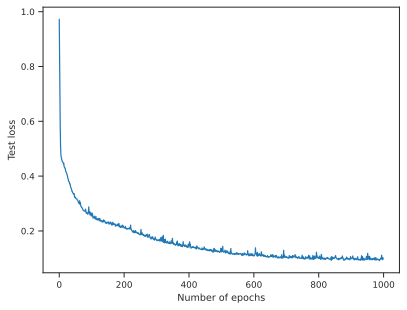

In [60]:
# Your code here
plt.plot(test_loss)
plt.xlabel('Number of epochs')
plt.ylabel('Test loss')
plt.show()

Now plot the observations vs predictions plot for the training data:

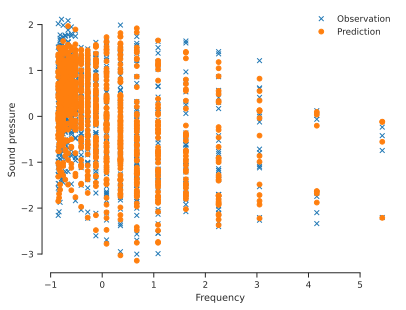

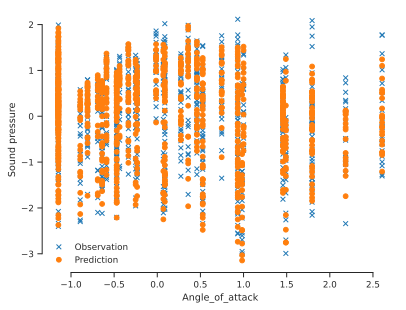

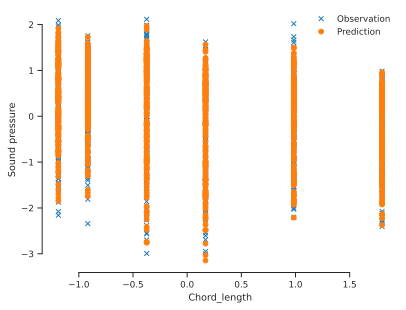

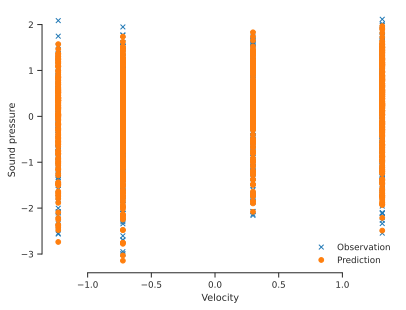

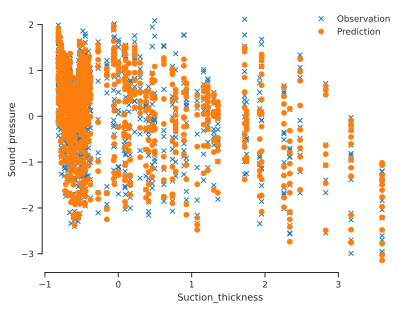

In [72]:
# Your code here
for i in range(5):
  fig, ax = plt.subplots(dpi=100)
  ax.plot(X_train[:,i],y_train, 'x', label='Observation')
  ax.plot(X_train[:,i], model(X_train),'o', label='Prediction')
  plt.legend(loc='best', frameon=False)
  sns.despine(trim=True);
  plt.xlabel(my_input_keys[i])
  plt.ylabel('Sound pressure')
  plt.show()

And do the observations vs predictions plot for the test data:

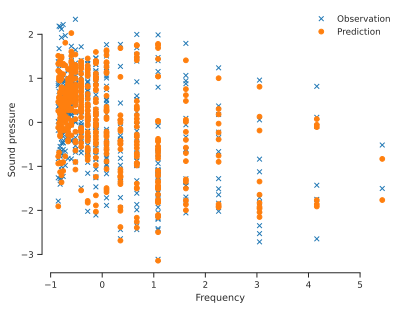

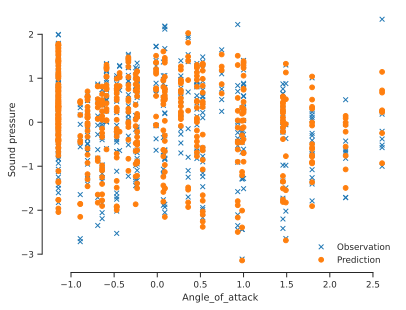

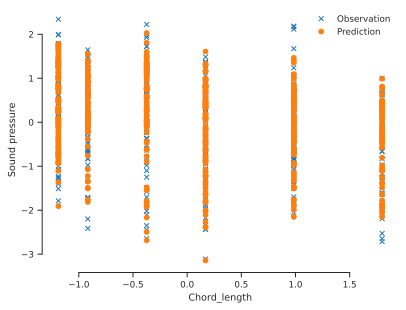

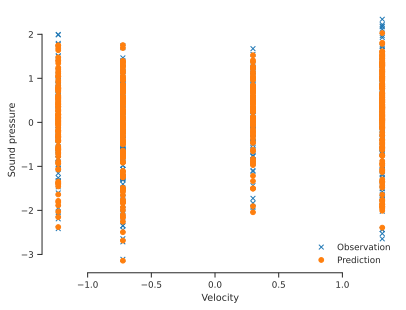

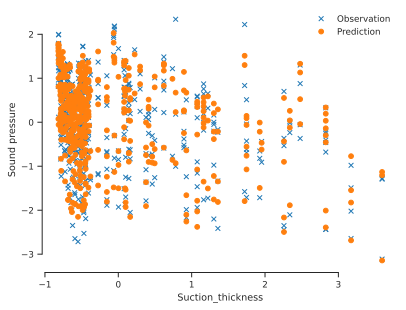

In [73]:
# Your code here
for i in range(5):
  fig, ax = plt.subplots(dpi=100)
  ax.plot(X_test[:,i],y_test, 'x', label='Observation')
  ax.plot(X_test[:,i], model(X_test),'o', label='Prediction')
  plt.legend(loc='best', frameon=False)
  sns.despine(trim=True);
  plt.xlabel(my_input_keys[i])
  plt.ylabel('Sound pressure')
  plt.show()

#### Part C.I - Investigate the effect of the batch size

For the given network, try batch sizes of 10, 25, 50, and 100 for 400 epochs.
In the sample plot, show the evolution of the test loss function for each case.
Which batch sizes lead to faster training times and why?
Which one would you choose?

**Answer:**

In [74]:
epochs = 400# pick me
lr = 0.01
reg_weight = 0
test_losses = []
models = []
batches = [10,25,50,100]# make me a list with the right batch sizes
for n_batch in batches:
    print('Training n_batch: {0:d}'.format(n_batch))
    net = nn.Sequential(nn.Linear(5, 20),
                    nn.Sigmoid(),
                    nn.Linear(20, 1))
    model, test_loss, X_train, y_train, X_test, y_test = train_net(
        X,
        y,
        net,
        reg_weight,
        n_batch,
        epochs,
        lr
    )
    test_losses.append(test_loss)
    models.append(model)

Training n_batch: 10


100%|██████████| 400/400 [01:16<00:00,  5.22it/s]


Training n_batch: 25


100%|██████████| 400/400 [00:33<00:00, 11.96it/s]


Training n_batch: 50


100%|██████████| 400/400 [00:19<00:00, 20.38it/s]


Training n_batch: 100


100%|██████████| 400/400 [00:12<00:00, 32.10it/s]


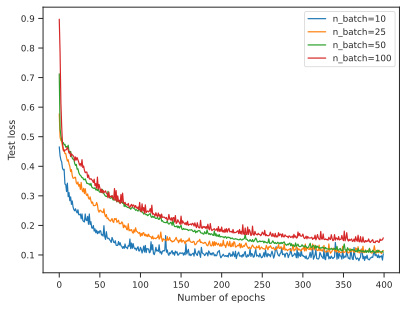

In [75]:
fig, ax = plt.subplots(dpi=100)
for tl, n_batch in zip(test_losses, batches):
    ax.plot(tl, label='n_batch={0:d}'.format(n_batch))
ax.set_xlabel('Number of epochs')
ax.set_ylabel('Test loss')
plt.legend(loc='best');

*Write your observsations about the batch size here*

The smaller the batch size is, the slower the training goes and the more accurate the network is (lower loss). This because a smaller batch size means the training will take more steps (each step takes a batch size of the training data until all of it is used).
<br> <br>
I would choose the batch size of 50 because you get most of benefit of the 10 and 25 batch sizes in less time.

#### Part C.II - Investigate the effect of the learning rate

Fix the batch size to the best one you identified in Part C.I.
For the given network, try learning rates of 1, 0.1, 0.01, and 0.001 for 400 epochs.
In the sample plot, show the evolution of the test loss function for each case.
Does the algorithm converge for all learning rates?
Which learning rate would you choose?

**Answer:**

In [76]:
# your code here
epochs = 400# pick me
lr_list = [1,0.1,0.01,0.001]# make me a list with the right learning rates
reg_weight = 0
test_losses = []
models = []
n_batch = 50
for lr in lr_list:
    print('Training lr: {0:1.3f}'.format(lr))
    net = nn.Sequential(nn.Linear(5, 20),
                    nn.Sigmoid(),
                    nn.Linear(20, 1))
    model, test_loss, X_train, y_train, X_test, y_test = train_net(
        X,
        y,
        net,
        reg_weight,
        n_batch,
        epochs,
        lr
    )
    test_losses.append(test_loss)
    models.append(model)

Training lr: 1.000


100%|██████████| 400/400 [00:22<00:00, 17.45it/s]


Training lr: 0.100


100%|██████████| 400/400 [00:21<00:00, 18.98it/s]


Training lr: 0.010


100%|██████████| 400/400 [00:20<00:00, 19.39it/s]


Training lr: 0.001


100%|██████████| 400/400 [00:23<00:00, 17.26it/s]


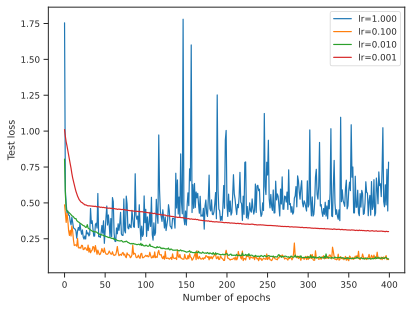

In [77]:
fig, ax = plt.subplots(dpi=100)
for tl, lr in zip(test_losses, lr_list):
    ax.plot(tl, label='lr={0:1.3f}'.format(lr))
ax.set_xlabel('Number of epochs')
ax.set_ylabel('Test loss')
plt.legend(loc='best');

The algorithm does converges for all learning rates except lr=1. I would choose lr=0.1 since it converges faster than the others and gives the best loss results.

#### Part C.III - Investigate the effect of the regularization weight

Fix the batch size to the value you selected in C.I and the learning rate to the value you selected in C.II.
For the given network, try regularization weights of 0, 1e-16, 1e-12, 1e-6, and 1e-3 for 400 epochs.
In the sample plot, show the evolution of the test loss function for each case.
Which regularization weight seems to be the best and why?

**Answer:**

In [80]:
# Your code here
epochs = 400# pick me
lr = 0.1# pick me
reg_weight_list = [0,1e-16,1e-12,1e-6,1e-3]# make me a list with the right regularization weights
test_losses = []
models = []
n_batch = 50
for reg_weight in reg_weight_list:
    print('Training reg_weight: {0}'.format(reg_weight))
    net = nn.Sequential(nn.Linear(5, 20),
                    nn.Sigmoid(),
                    nn.Linear(20, 1))
    model, test_loss, X_train, y_train, X_test, y_test =train_net(
        X,
        y,
        net,
        reg_weight,
        n_batch,
        epochs,
        lr
    )
    test_losses.append(test_loss)
    models.append(model)


Training reg_weight: 0


100%|██████████| 400/400 [00:20<00:00, 19.85it/s]


Training reg_weight: 1e-16


100%|██████████| 400/400 [00:20<00:00, 19.53it/s]


Training reg_weight: 1e-12


100%|██████████| 400/400 [00:19<00:00, 20.34it/s]


Training reg_weight: 1e-06


100%|██████████| 400/400 [00:22<00:00, 18.15it/s]


Training reg_weight: 0.001


100%|██████████| 400/400 [00:19<00:00, 20.24it/s]


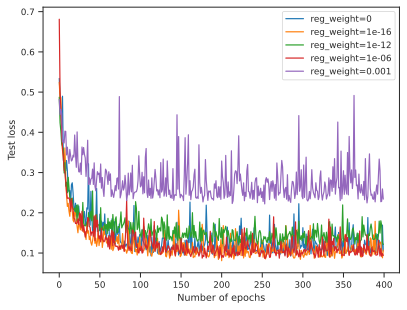

In [83]:
fig, ax = plt.subplots(dpi=100)
for tl, reg_weight in zip(test_losses, reg_weight_list):
    ax.plot(tl, label='reg_weight={0}'.format(reg_weight))
ax.set_xlabel('Number of epochs')
ax.set_ylabel('Test loss')
plt.legend(loc='best');

The best regularization weight is 1e-6 because it gives the lowest loss results.

#### Part D.I - Train a bigger network

You have developed some intuition about the parameters involved in training a network. Now, let's train a larger one.
In particular, use a 5-layer deep network with 100 neurons per layer.
You can use the sigmoid activation function, or you can change it to something else.
Make sure you plot:
- the evolution of the test loss as a function of the epochs
- the observations vs predictions plot for the test data

**Answer:**

In [99]:
# your code here
epochs = 400
lr = 0.01
reg_weight = 1e-6
n_batch = 50
net = nn.Sequential(nn.Linear(5, 100),
                    nn.ReLU(),
                    nn.Linear(100, 100),
                    nn.ReLU(),
                    nn.Linear(100, 100),
                    nn.ReLU(),
                    nn.Linear(100, 100),
                    nn.ReLU(),
                    nn.Linear(100, 100),
                    nn.ReLU(),
                    nn.Linear(100, 100),
                    nn.ReLU(),
                    nn.Linear(100, 1))
model, test_loss, X_train, y_train, X_test, y_test = train_net(
    X,
    y,
    net,
    reg_weight,
    n_batch,
    epochs,
    lr
)
#

100%|██████████| 400/400 [01:30<00:00,  4.41it/s]


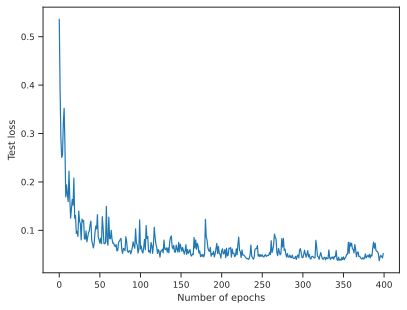

In [100]:
fig, ax = plt.subplots(dpi=100)
ax.plot(test_loss)
ax.set_xlabel('Number of epochs')
ax.set_ylabel('Test loss')
plt.show()


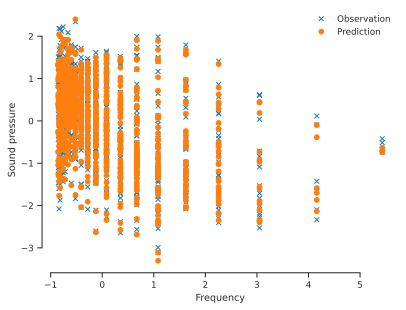

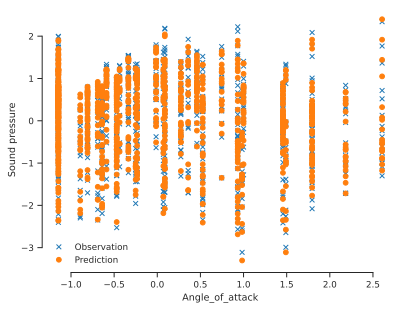

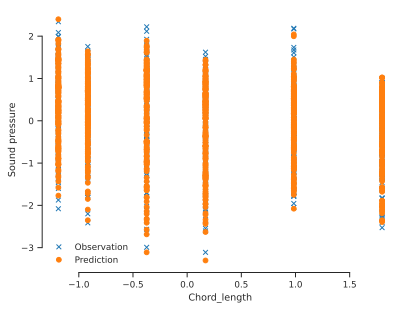

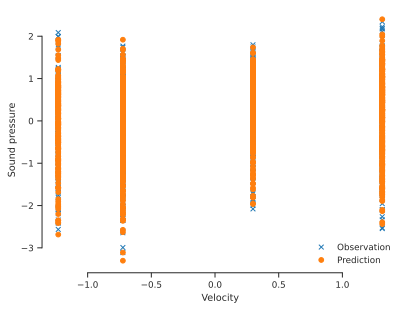

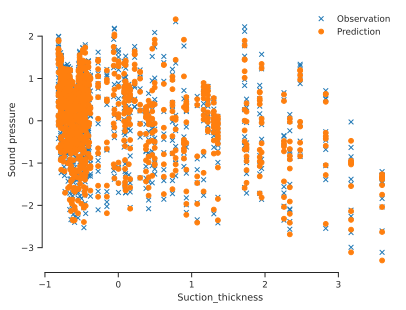

In [103]:
for i in range(5):
  fig, ax = plt.subplots(dpi=100)
  ax.plot(X_train[:,i],y_train, 'x', label='Observation')
  ax.plot(X_train[:,i], model(X_train),'o', label='Prediction')
  plt.legend(loc='best', frameon=False)
  sns.despine(trim=True);
  plt.xlabel(my_input_keys[i])
  plt.ylabel('Sound pressure')
  plt.show()

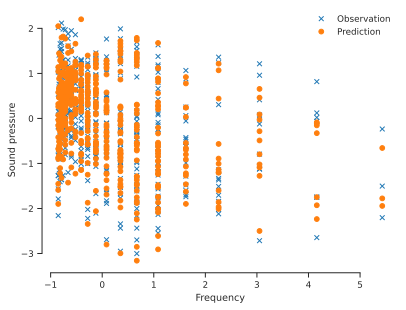

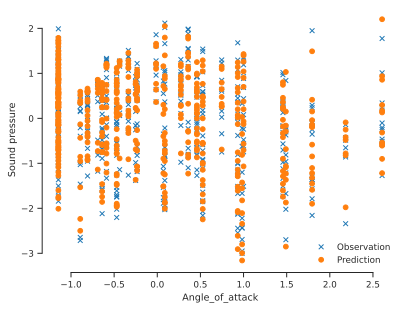

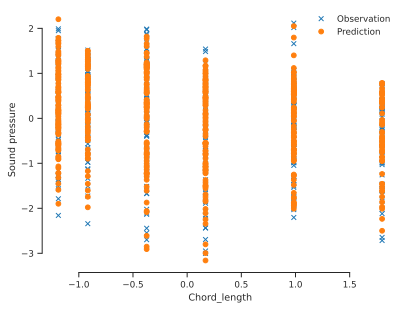

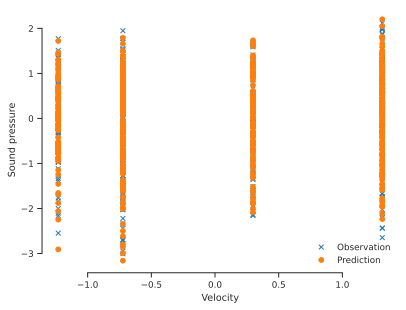

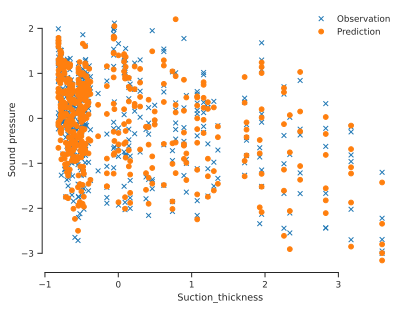

In [104]:
for i in range(5):
  fig, ax = plt.subplots(dpi=100)
  ax.plot(X_test[:,i],y_test, 'x', label='Observation')
  ax.plot(X_test[:,i], model(X_test),'o', label='Prediction')
  plt.legend(loc='best', frameon=False)
  sns.despine(trim=True);
  plt.xlabel(my_input_keys[i])
  plt.ylabel('Sound pressure')
  plt.show()

#### Part D.II - Make a prediction

Visualize the scaled sound level as a function of the stream velocity for a fixed frequency of 2500 Hz, a chord length of 0.1 m, a suction side displacement thickness of 0.01 m, and an angle of attack of 0, 5, and 10 degrees.

**Answer:**

This is just a check for your model.
You will have to run the following code segments for the best model you have found.

In [101]:
best_model = model # set this equal to your best model

def plot_sound_level_as_func_of_stream_vel(
    freq=2500,
    angle_of_attack=10,
    chord_length=0.1,
    suc_side_disp_thick=0.01,
    ax=None,
    label=None
):

    if ax is None:
        fig, ax = plt.subplots(dpi=100)

    # The velocities on which we want to evaluate the model
    vel = np.linspace(X[:, 3].min(), X[:, 3].max(), 100)[:, None]

    # Make the input for the model
    freqs = freq * np.ones(vel.shape)
    angles = angle_of_attack * np.ones(vel.shape)
    chords = chord_length * np.ones(vel.shape)
    sucs = suc_side_disp_thick * np.ones(vel.shape)

    # Put all these into a single array
    XX = np.hstack([freqs, angles, chords, vel, sucs])

    ax.plot(vel, best_model(XX), label=label)

    ax.set_xlabel('Velocity (m/s)')
    ax.set_ylabel('Scaled sound pressure level (decibels)')

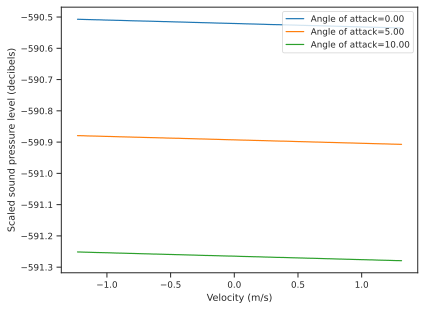

In [102]:
fig, ax = plt.subplots(dpi=100)
for aofa in [0, 5, 10]:
    plot_sound_level_as_func_of_stream_vel(
        angle_of_attack=aofa,
        ax=ax,
        label='Angle of attack={0:1.2f}'.format(aofa)
)
plt.legend(loc='best');